### Show Mapping Results

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path_mapping_stats = "../../data/mapping_stats_2pass/"

In [8]:
def LogParser(file_path:str) -> pd.DataFrame:
    """Parse out Single Log

    Args:
        file_path (str): path for log file

    Returns:
        pd.DataFrame: a dataframe that stores parsed log data
    """
    
    row_name = file_path.split('/')[-1][:-14]
    
    with open(file_path, 'r') as log:
        cols = []
        rows = []
        
        idx = 0
        while True:
            line = log.readline().strip()  # remove heading and tailing whitespaces
            
            if idx < 5:  # skip first 5 lines (useless info)
                idx += 1
                continue
            
            if not line:  # empty line below 5th line means end of file
                break
            
            if '|' not in line:  # line without '|' means simple informative row
                continue
            
            col, row = line.split('|')
            cols.append(col.strip())  # remove heading and tailing whitespaces
            rows.append(row.strip())  # remove heading and tailing whitespaces
    
    return pd.DataFrame({c:r for c, r in zip(cols, rows)}, index=[row_name])

In [11]:
def MultiLogParser(file_path: str) -> pd.DataFrame:
    """Parse out Multiple Log files=

    Args:
        file_path (str): path where all the log files are in

    Returns:
        pd.DataFrame: a dataframe that contains all the information of log files
    """
    
    res_df = pd.DataFrame()  # empty dataframe
    
    fnames = os.listdir(file_path)
    
    for fname in fnames:
        fpath = os.path.join(file_path, fname)
        res_df = pd.concat([res_df, LogParser(fpath)])
    
    return res_df

In [18]:
mapping_stats = MultiLogParser(path_mapping_stats)
mapping_stats.sort_index(inplace=True)

In [19]:
mapping_stats.head()

,Number of input reads,Average input read length,Uniquely mapped reads number,Uniquely mapped reads %,Average mapped length,Number of splices: Total,Number of splices: Annotated (sjdb),Number of splices: GT/AG,Number of splices: GC/AG,Number of splices: AT/AC,...,Number of reads mapped to too many loci,% of reads mapped to too many loci,Number of reads unmapped: too many mismatches,% of reads unmapped: too many mismatches,Number of reads unmapped: too short,% of reads unmapped: too short,Number of reads unmapped: other,% of reads unmapped: other,Number of chimeric reads,% of chimeric reads
CCI4_1x_4,52412998,201,44523154,84.95%,200.98,27888396,27859414,27644384,212711,13409,...,102305,0.20%,0,0.00%,1566278,2.99%,325180,0.62%,0,0.00%
CCI4_1x_6,64622725,201,52466365,81.19%,200.62,33446588,33400107,33146634,253033,16715,...,109004,0.17%,0,0.00%,4137571,6.40%,574642,0.89%,0,0.00%
CCI4_1x_9,56679431,201,46860370,82.68%,200.81,31128943,31103070,30848081,243706,15129,...,105617,0.19%,0,0.00%,2896910,5.11%,255388,0.45%,0,0.00%
CCI4_3x_2,56709978,201,46177111,81.43%,200.90,29902198,29876398,29631934,236187,12394,...,133055,0.23%,0,0.00%,2876273,5.07%,217958,0.38%,0,0.00%
CCI4_3x_5,56879454,201,47593658,83.67%,200.92,31325761,31299274,31040622,246775,15271,...,142645,0.25%,0,0.00%,2340089,4.11%,201943,0.36%,0,0.00%


In [49]:
mapping_stats_core = mapping_stats[
    ['Uniquely mapped reads %',
     '% of reads mapped to multiple loci',
     '% of reads mapped to too many loci',
     '% of reads unmapped: too short',
     '% of reads unmapped: other']
].copy()

for column in mapping_stats_core.columns:
    mapping_stats_core[column] = mapping_stats_core[column].map(lambda x: float(x[:-1]))

mapping_stats_summary = mapping_stats_core.copy()

mapping_stats_summary.columns = [
    'uniquely_mapped',
    'multiple_loci',
    'too_many_loci',
    'too_short_loci',
    'other_reason'
]

mapping_stats_summary['multi_mapped'] = mapping_stats_summary['multiple_loci'] + mapping_stats_summary['too_many_loci']
mapping_stats_summary['unmapped'] = mapping_stats_summary['too_short_loci'] + mapping_stats_summary['other_reason']

mapping_stats_summary = mapping_stats_summary.drop(['multiple_loci', 
                                                    'too_many_loci',
                                                    'too_short_loci',
                                                    'other_reason'],
                                                   axis=1)

mapping_stats_summary.head()

,uniquely_mapped,multi_mapped,unmapped
CCI4_1x_4,84.95,11.45,3.61
CCI4_1x_6,81.19,11.52,7.29
CCI4_1x_9,82.68,11.77,5.56
CCI4_3x_2,81.43,13.11,5.45
CCI4_3x_5,83.67,11.86,4.47


<AxesSubplot: >

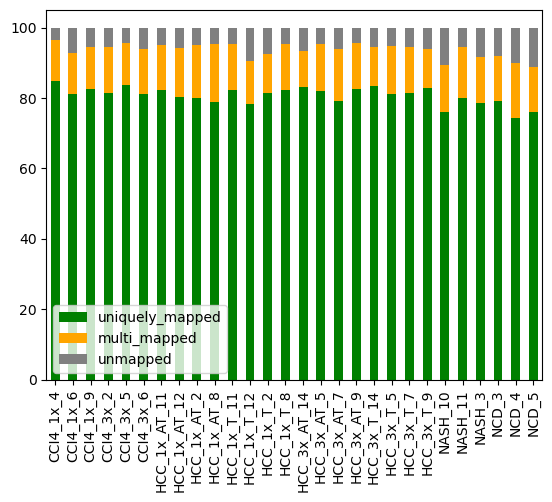

In [50]:
mapping_stats_summary.plot(kind='bar', stacked=True, color=['green', 'orange', 'grey'])

In [48]:
mapping_stats_summary_sorted = mapping_stats_summary.sort_values(by='uniquely_mapped', ascending=False)
mapping_stats_summary_sorted.head()

,uniquely_mapped,multi_mapped,unmapped
CCI4_1x_4,84.95,11.45,3.61
CCI4_3x_5,83.67,11.86,4.47
HCC_3x_T_14,83.51,10.92,5.57
HCC_3x_AT_14,83.17,10.27,6.56
HCC_3x_T_9,82.81,11.24,5.95


In [56]:
mapping_stats_summary_sorted.tail(10)

,uniquely_mapped,multi_mapped,unmapped
HCC_1x_AT_2,80.09,14.92,4.99
NASH_11,80.00,14.48,5.52
HCC_3x_AT_7,79.17,14.66,6.17
NCD_3,79.05,12.97,7.98
HCC_1x_AT_8,78.75,16.62,4.63
NASH_3,78.47,13.07,8.46
HCC_1x_T_12,78.16,12.22,9.62
NASH_10,76.08,13.31,10.61
NCD_5,75.98,12.90,11.12
NCD_4,74.40,15.45,10.15


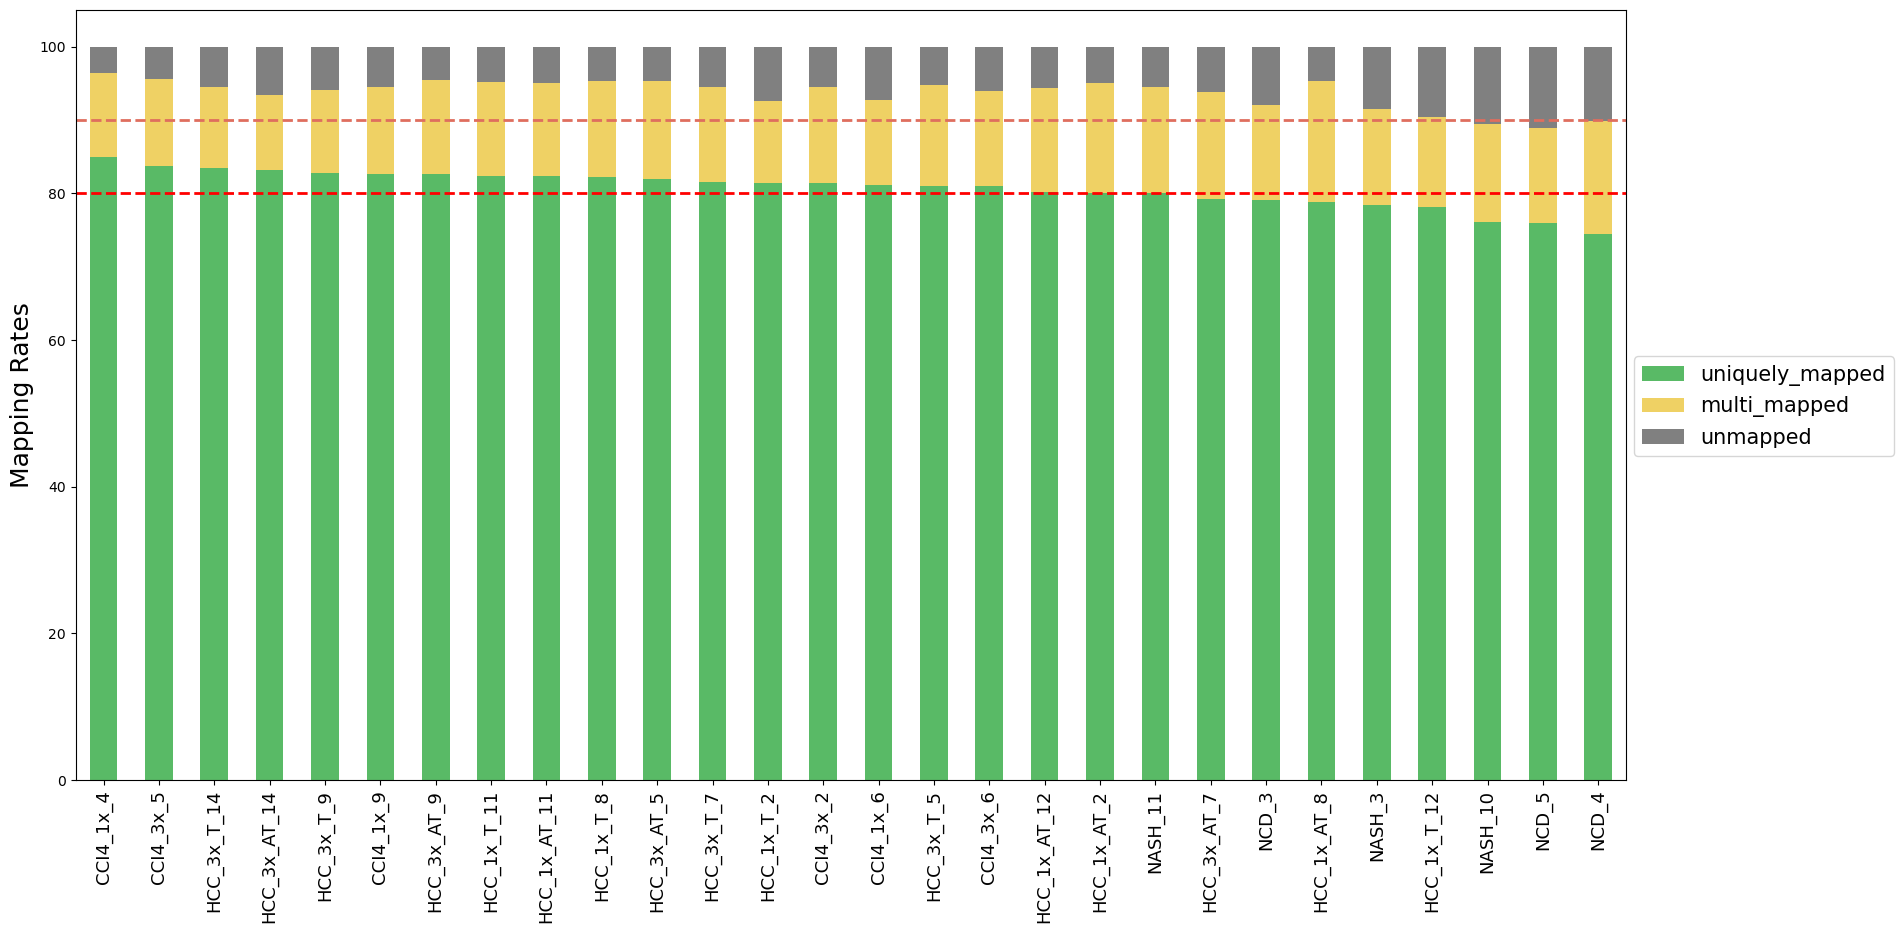

In [96]:
plot = mapping_stats_summary_sorted.plot(kind='bar', stacked=True, color=['#59BA66', '#EFD164', 'grey'], figsize=(20, 10))
plot.axhline(90, color='#DF6E5E', linewidth=2, linestyle='--')
plot.axhline(80, color='red', linewidth=2, linestyle='--')
plt.xticks(fontsize=13)
plt.ylabel("Mapping Rates", fontsize=18)
plt.legend(bbox_to_anchor=(1.005, 0.55), loc='upper left', borderaxespad=0, fontsize=15)

### Show Sample Quality

In [116]:
import numpy as np

path_rsem_result = "../../data/rsem_result/"

In [130]:
def CountExtractor(file_path: str) -> list:
    """Extract count values from rsem results

    Args:
        file_path (str): a path where all the rsem results are in

    Returns:
        list: a list containing dataframes of expected_count, tpm, fpkm
    """
    
    cnt_df = pd.DataFrame()
    tpm_df = pd.DataFrame()
    fpkm_df = pd.DataFrame()
    
    rsem_results = os.listdir(file_path)
    
    first = True
    for rsem in rsem_results:
        temp = pd.read_csv(os.path.join(file_path, rsem), sep='\t')
        temp.index = temp['gene_id']
        
        if first:
            first = False
        else:
            if all(temp.index != cnt_df.index):
                print("Error, Index not matching!!\n")
                break
        
        name = rsem[:-14]
        
        cnt_df[name] = temp['expected_count']
        tpm_df[name] = temp['TPM']
        fpkm_df[name] = temp['FPKM']
    
    return [cnt_df, tpm_df, fpkm_df]

In [131]:
cnt, tpm, fpkm = CountExtractor(path_rsem_result)

In [132]:
tpm.head()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001.5,25.47,27.03,19.52,22.94,24.70,22.09,20.10,16.10,19.53,17.09,...,17.09,15.14,18.37,15.13,19.92,22.32,22.29,16.16,21.00,20.39
ENSMUSG00000000003.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSMUSG00000000028.16,0.81,0.64,0.47,0.69,0.76,0.39,0.49,0.34,0.45,0.57,...,0.27,0.41,1.24,0.63,0.73,0.70,0.56,0.68,0.90,0.59
ENSMUSG00000000031.17,32.93,126.38,54.87,13.31,37.11,0.48,30.43,36.78,0.00,3.13,...,1.95,0.45,1.12,0.08,27.88,53.51,11.83,6.13,0.83,178.22
ENSMUSG00000000037.18,0.04,0.09,0.09,0.04,0.05,0.01,0.03,0.04,0.00,0.01,...,0.13,0.02,0.14,0.00,0.66,0.05,0.01,0.02,0.08,0.05


In [145]:
log_tpm.head()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001.5,1.422754,1.447623,1.312177,1.379124,1.409933,1.363424,1.324282,1.232996,1.312389,1.257439,...,1.257439,1.207904,1.287130,1.207634,1.320562,1.367729,1.367169,1.234517,1.342423,1.330211
ENSMUSG00000000003.16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000000028.16,0.257679,0.214844,0.167317,0.227887,0.245513,0.143015,0.173186,0.127105,0.161368,0.195900,...,0.103804,0.149219,0.350248,0.212188,0.238046,0.230449,0.193125,0.225309,0.278754,0.201397
ENSMUSG00000000031.17,1.530584,2.105101,1.747179,1.155640,1.581039,0.170262,1.497344,1.577262,0.000000,0.615950,...,0.469822,0.161368,0.326336,0.033424,1.460597,1.736476,1.108227,0.853090,0.262451,2.253386
ENSMUSG00000000037.18,0.017033,0.037426,0.037426,0.017033,0.021189,0.004321,0.012837,0.017033,0.000000,0.004321,...,0.053078,0.008600,0.056905,0.000000,0.220108,0.021189,0.004321,0.008600,0.033424,0.021189


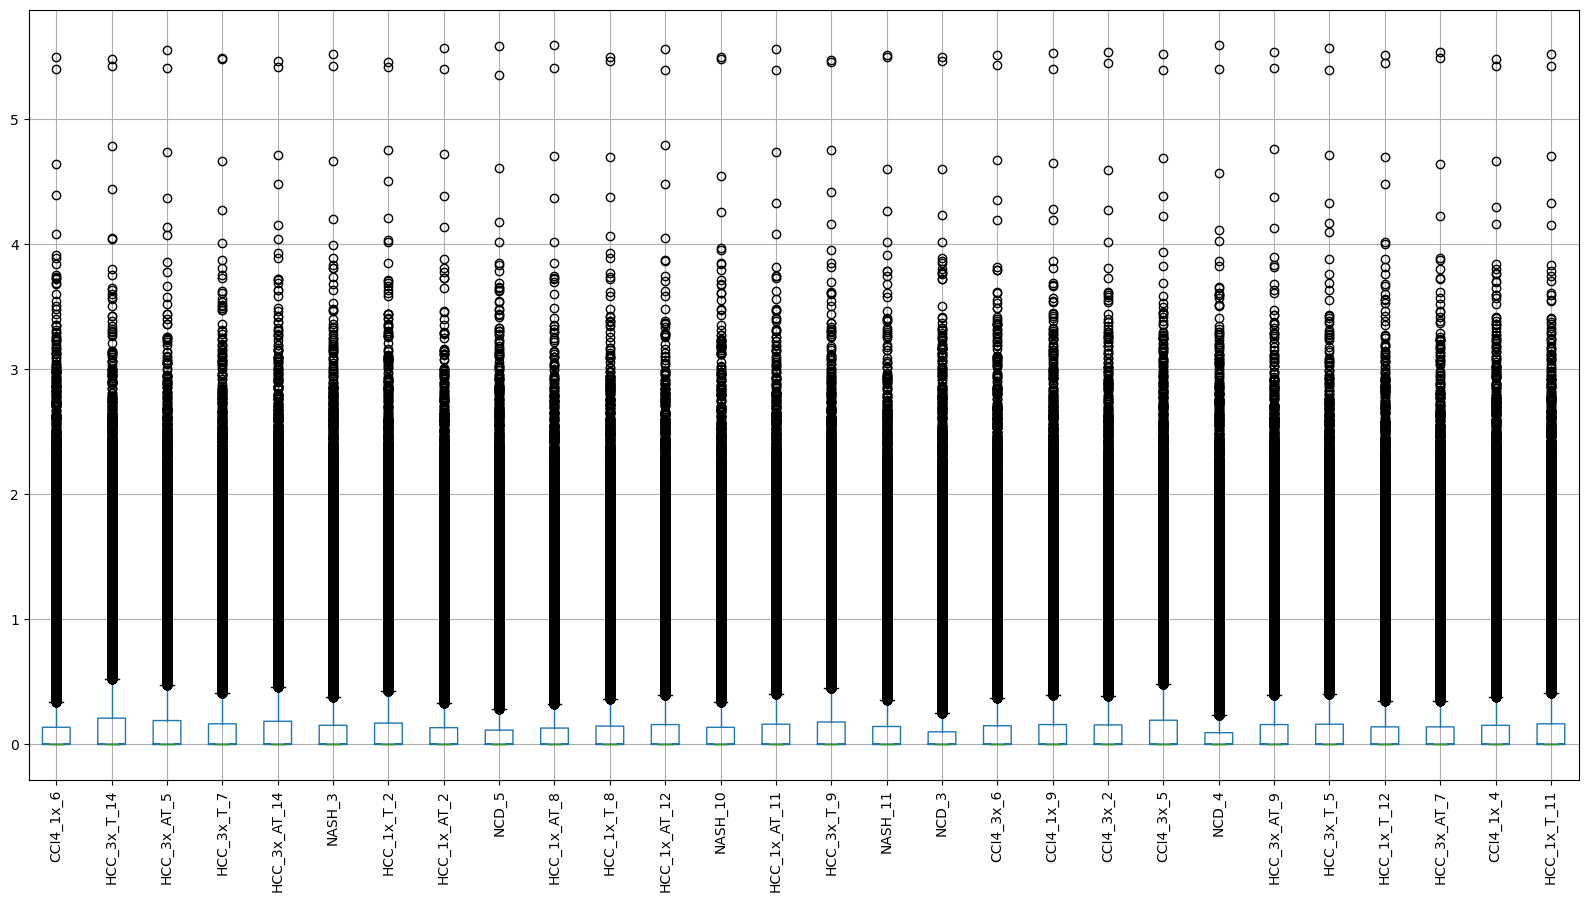

In [142]:
log_tpm = np.log10(tpm+1)
log_tpm.boxplot(figsize=(20, 10), notch=True)
plt.xticks(rotation=90);

In [135]:
cnt.head()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001.5,6183.0,5080.0,4472.0,4622.0,5769.0,4420.0,5278.0,3841.0,3875.0,4724.0,...,3480.0,3293.0,3704.0,3527.0,4715.0,5048.0,5853.0,4204.0,3951.0,4690.0
ENSMUSG00000000003.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000028.16,99.0,75.0,56.0,80.0,97.0,49.0,81.0,51.0,55.0,100.0,...,28.0,57.0,137.0,82.0,106.0,79.0,81.0,100.0,104.0,74.0
ENSMUSG00000000031.17,4982.0,14815.0,7907.0,1664.0,5435.0,42.0,5069.0,5509.0,0.0,552.0,...,266.0,58.0,135.0,11.0,4102.0,7528.0,1969.0,1058.0,106.0,25100.0
ENSMUSG00000000037.18,2.0,27.0,13.0,13.0,8.0,1.0,11.0,10.0,0.0,1.0,...,29.0,4.0,24.0,0.0,30.0,10.0,2.0,2.0,8.0,7.0


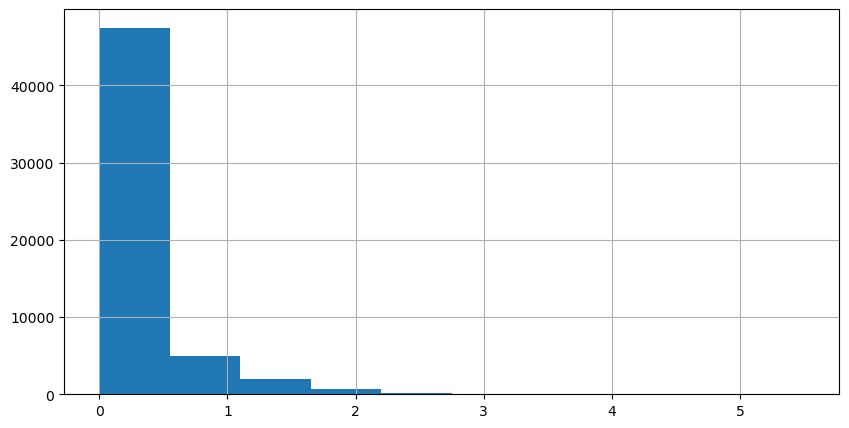

In [144]:
log_tpm['CCI4_1x_6'].hist(figsize=(10, 5));

### Multi-Dimensional Scaling (MDS)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(log_tpm)
pc_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])